In [1]:
import numpy as np 
import pandas as pd 
import os
from  prophet import Prophet
import warnings
warnings.filterwarnings("ignore")

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/alibaba-baba-stock-dataset/BABA.csv


# Read Dataset

In [2]:
path = '/kaggle/input/alibaba-baba-stock-dataset/BABA.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,216.600006,219.979996,216.539993,219.770004,216.854889,15873500
1,2020-01-03,216.350006,218.203003,216.009995,217.000000,214.121628,8604500
2,2020-01-06,214.889999,217.160004,214.089996,216.639999,213.766403,11885500
3,2020-01-07,217.639999,218.940002,216.690002,217.630005,214.743286,9388000
4,2020-01-08,216.600006,220.649994,216.320007,218.000000,215.108368,11959100


# Filter the spesific columns 

In [4]:
df = df[['Date','Close']]
df

,Date,Close
0,2020-01-02,219.770004
1,2020-01-03,217.000000
2,2020-01-06,216.639999
3,2020-01-07,217.630005
4,2020-01-08,218.000000
...,...,...
1084,2024-04-24,74.629997
1085,2024-04-25,75.110001
1086,2024-04-26,75.550003
1087,2024-04-29,76.410004


# Rename the columns for Prophet Model time series:ds, price:y

In [5]:
df.columns = ['ds','y']
df.head(3)

,ds,y
0,2020-01-02,219.770004
1,2020-01-03,217.000000
2,2020-01-06,216.639999


# Model

In [6]:
model = Prophet()
model.fit(df)

15:42:39 - cmdstanpy - INFO - Chain [1] start processing
15:42:39 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future = model.make_future_dataframe(360) # predict next 720 days

In [8]:
guess = model.predict(future)
guess

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,213.101599,192.387889,216.759019,213.101599,213.101599,-7.737535,-7.737535,-7.737535,-1.171753,-1.171753,-1.171753,-6.565782,-6.565782,-6.565782,0.0,0.0,0.0,205.364064
1,2020-01-03,213.014060,193.737602,218.255610,213.014060,213.014060,-7.067844,-7.067844,-7.067844,-1.160115,-1.160115,-1.160115,-5.907729,-5.907729,-5.907729,0.0,0.0,0.0,205.946216
2,2020-01-06,212.751443,195.326765,220.607787,212.751443,212.751443,-5.689839,-5.689839,-5.689839,-1.918468,-1.918468,-1.918468,-3.771372,-3.771372,-3.771372,0.0,0.0,0.0,207.061604
3,2020-01-07,212.663904,196.958000,220.841539,212.663904,212.663904,-3.887262,-3.887262,-3.887262,-0.855927,-0.855927,-0.855927,-3.031335,-3.031335,-3.031335,0.0,0.0,0.0,208.776643
4,2020-01-08,212.576366,197.109005,222.590835,212.576366,212.576366,-2.774198,-2.774198,-2.774198,-0.483767,-0.483767,-0.483767,-2.290431,-2.290431,-2.290431,0.0,0.0,0.0,209.802167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,2025-04-21,52.521843,-25.375264,120.319667,-22.439958,124.872600,-3.605203,-3.605203,-3.605203,-1.918468,-1.918468,-1.918468,-1.686736,-1.686736,-1.686736,0.0,0.0,0.0,48.916640
1445,2025-04-22,52.465405,-26.558823,122.488124,-23.051377,125.138873,-2.850505,-2.850505,-2.850505,-0.855927,-0.855927,-0.855927,-1.994579,-1.994579,-1.994579,0.0,0.0,0.0,49.614900
1446,2025-04-23,52.408967,-27.121156,125.901541,-23.641076,125.527519,-2.790323,-2.790323,-2.790323,-0.483767,-0.483767,-0.483767,-2.306556,-2.306556,-2.306556,0.0,0.0,0.0,49.618645
1447,2025-04-24,52.352530,-27.702158,122.686026,-23.985120,125.829963,-3.792848,-3.792848,-3.792848,-1.171753,-1.171753,-1.171753,-2.621095,-2.621095,-2.621095,0.0,0.0,0.0,48.559682


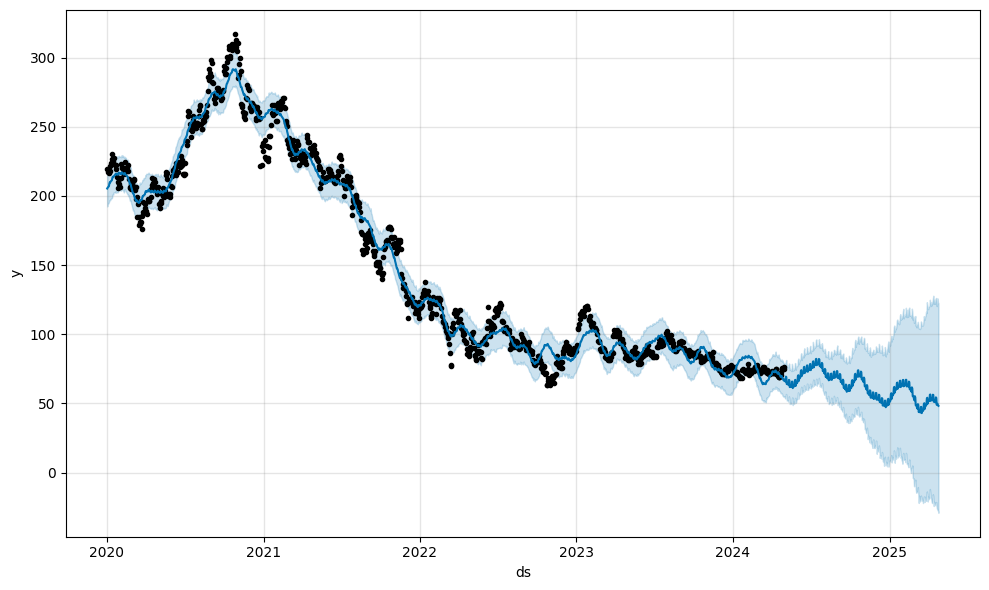

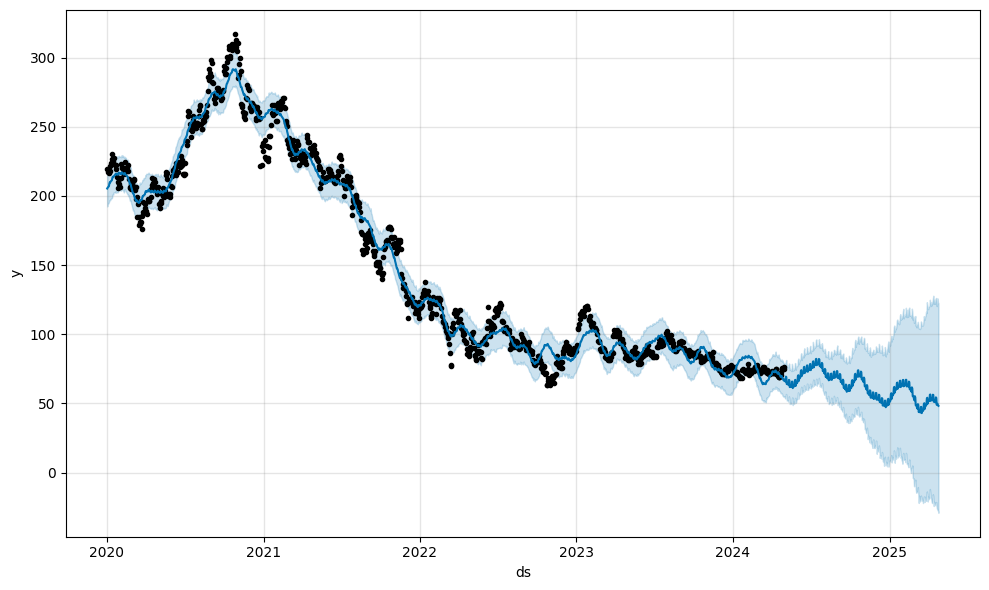

In [9]:
model.plot(guess)